# Notable Observations: What makes them notable?

 According to the eBird API documentation, notable observations can be for locally or nationally rare species or are otherwise unusual, e.g. over-wintering birds in a species which is normally only a summer visitor.

# Issues to work:

1. DAVID - Notable birds in region - try Texas or Austin (Houston!!) -- pick a few wildlife refuges / on the coast / national seashore / etc

#### Citation: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

In [6]:
# import dependencies
import os, csv, requests, json, datetime
import pandas as pd
import plotly.express as px
from config import api_key, mapbox_token, g_key
from datetime import date

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

<img src="./Resources/Calliope_Range_Map.png" alt="RANGE MAP: Calliope Hummingbird, https://doi.org/10.2173/bow.calhum.01" style="border: 1px solid darkgray" align="left" width="400px">

<span style="color:white">
<h1 align="center">Notable Observations in Texas</h3>
<h3 align="center">Calliope Hummingbird, Selasphorus calliope</h3>
    
Some range maps for the Calliope Hummingbird extend the Fall Migration zone further east in Texas, but the majority limit the range to west Texas or even far west Texas.  The fall migration south is underway as the Calliope make their way to their wintering grounds in the pine oak forests of Mexico.
    

#### Interesting facts (from WhatBird.com):
    
Although it is the smallest bird in the United States, the Calliope Hummingbird travels more than 5,000 miles from the mountains of the northwest to Mexico and back.
    
It prefers high mountains, and has been seen as high as 11,000 feet.
    
The Calliope Hummingbird is the smallest breeding bird in North America and the smallest long-distance avian migrant in the world.
    
A group of hummingbirds has many collective nouns, including a “bouquet", "glittering", "hover", "shimmer", and "tune” of hummingbirds.
    
###### <blockquote>Image citation: Calder, W. A. and L. L. Calder (2020). Calliope Hummingbird (Selasphorus calliope), version 1.0. In Birds of the World (A. F. Poole and F. B. Gill, Editors). Cornell Lab of Ornithology, Ithaca, NY, USA. https://doi.org/10.2173/bow.calhum.01</blockquote>

In [18]:
## Import sound dependencies
from IPython.display import Audio, display


def allDone():
    display(
        Audio(
            url="https://www.allaboutbirds.org/guide/assets/sound/calliope_call.mp3",
            autoplay=True,
        )
    )


## Insert whatever audio file you want above
# allDone()

In [89]:
# Obtain list of Texas cities and codes

regionType = "subnational2"
parentRegionCode = "US-TX"
state = "Texas"

url = (
    "https://api.ebird.org/v2/ref/region/list/"
    + regionType
    + "/"
    + parentRegionCode
    + ".json"
)

r = requests.get(url, params={"key": api_key})

In [4]:
r.url

'https://api.ebird.org/v2/ref/region/list/subnational2/US-TX.json?key=d56mdhi9b35r'

In [5]:
df_city_codes = pd.DataFrame(r.json())
df_city_codes.loc[df_city_codes["name"] == "Austin"]

code    name
7  US-TX-015  Austin

In [6]:
cities = df_city_codes[
    "code"
].to_list()  # save cities to a list to be able to iterate over later

# START - TEXAS

In [76]:
today = date.today()
back_short = 3
back_long = 30

In [77]:
# ALL notable observations in Texas
regionCode = "US-TX"

url_notables = (
    "https://api.ebird.org/v2/data/obs/"
    + regionCode
    + "/recent/notable?back=30"  # max number of days back for observations = 30
)

r_notables = requests.get(
    url_notables, params={"key": api_key, "back": back_long, "detail": "full"}
)

In [78]:
r_notables.status_code

200

In [79]:
r_notables.url

'https://api.ebird.org/v2/data/obs/US-TX/recent/notable?back=30&key=d56mdhi9b35r&back=30&detail=full'

### Notable Observations Dataframe

In [80]:
df_notables = pd.DataFrame(r_notables.json())

In [81]:
pd.to_datetime(df_notables["obsDt"])
df_notables["Year"] = pd.DatetimeIndex(df_notables["obsDt"]).year
df_notables["Month"] = pd.DatetimeIndex(df_notables["obsDt"]).month
df_notables["Day"] = pd.DatetimeIndex(df_notables["obsDt"]).day

In [82]:
df_notables.columns  # Pulled in the detailed dataset to pick which columns I wanted to keep and rename.

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [83]:
df_notables.drop(
    columns=[
        "locId",
        "locName",
        "obsValid",
        "obsReviewed",
        "locationPrivate",
        "userDisplayName",
        "presenceNoted",
        "hasComments",
        "evidence",
        "firstName",
        "lastName",
        "hasRichMedia",
    ]
)

speciesCode          comName                 sciName             obsDt  \
0         belvir     Bell's Vireo            Vireo bellii  2020-09-30 23:34   
1         brnthr   Brown Thrasher         Toxostoma rufum  2020-09-30 19:57   
2         brnthr   Brown Thrasher         Toxostoma rufum  2020-09-30 19:57   
3         brnthr   Brown Thrasher         Toxostoma rufum  2020-09-30 19:57   
4         brnboo      Brown Booby        Sula leucogaster  2020-09-30 18:45   
...          ...              ...                     ...               ...   
3903      pomjae  Pomarine Jaeger  Stercorarius pomarinus  2020-09-01 07:16   
3904      pomjae  Pomarine Jaeger  Stercorarius pomarinus  2020-09-01 07:16   
3905      pipplo    Piping Plover      Charadrius melodus  2020-09-01 06:58   
3906      pipplo    Piping Plover      Charadrius melodus  2020-09-01 06:58   
3907      grekis   Great Kiskadee    Pitangus sulphuratus  2020-09-01 06:35   

      howMany        lat         lng      subId subnational2Code  \
0         1.0  30.609820  -96.282113  S74266845        US-TX-041   
1         1.0  30.621147 -103.982382  S74265850        US-TX-243   
2         1.0  30.621147 -103.982382  S74265850        US-TX-243   
3         1.0  30.621147 -103.982382  S74265850        US-TX-243   
4        14.0  29.879946  -93.909931  S74261584        US-TX-245   
...       ...        ...         ...        ...              ...   
3903      1.0  30.700161  -97.359747  S73071023        US-TX-491   
3904      1.0  30.700161  -97.359747  S73071023        US-TX-491   
3905      1.0  33.070398  -96.991596  S73064923        US-TX-121   
3906      1.0  33.070398  -96.991596  S73064924        US-TX-121   
3907      1.0  29.059206  -95.274568  S73075852        US-TX-039   

     subnational2Name subnational1Code subnational1Name countryCode  \
0              Brazos            US-TX            Texas          US   
1          Jeff Davis            US-TX            Texas          US   
2          Jeff Davis            US-TX            Texas          US   
3          Jeff Davis            US-TX            Texas          US   
4           Jefferson            US-TX            Texas          US   
...               ...              ...              ...         ...   
3903       Williamson            US-TX            Texas          US   
3904       Williamson            US-TX            Texas          US   
3905           Denton            US-TX            Texas          US   
3906           Denton            US-TX            Texas          US   
3907         Brazoria            US-TX            Texas          US   

        countryName         obsId checklistId  Year  Month  Day  
0     United States  OBS989146134     CL22990  2020      9   30  
1     United States  OBS989134631     CL23634  2020      9   30  
2     United States  OBS989134631     CL23634  2020      9   30  
3     United States  OBS989134631     CL23634  2020      9   30  
4     United States  OBS989086200     CL22322  2020      9   30  
...             ...           ...         ...   ...    ...  ...  
3903  United States  OBS975170119     CL23348  2020      9    1  
3904  United States  OBS975170119     CL23348  2020      9    1  
3905  United States  OBS975090825     CL24759  2020      9    1  
3906  United States  OBS975090875     CL24759  2020      9    1  
3907  United States  OBS975219637     CL22320  2020      9    1  

[3908 rows x 19 columns]

In [84]:
columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
    "subnational2Name": "City_Name",
    "subnational1Code": "State_Code",
    "subnational1Name": "State_Name",
    "countryCode": "Country_Code",
    "countryName": "Country_Name",
}

df_notables = df_notables.rename(columns=columns_dict)

In [85]:
df_notables["Bird_Count"].fillna(value=1, inplace=True)

In [86]:
df_notables.to_csv("Resources/NotableObs_eBird.csv", index=False)

observation_data = os.path.join("Resources", "NotableObs_eBird.csv")

In [99]:
df_notables["Notable_Normal"] = 2
df_notables.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'subnational2Code', 'City_Name',
       'State_Code', 'State_Name', 'Country_Code', 'Country_Name',
       'userDisplayName', 'obsId', 'checklistId', 'presenceNoted',
       'hasComments', 'firstName', 'lastName', 'hasRichMedia', 'evidence',
       'Year', 'Month', 'Day', 'Notable_Normal'],
      dtype='object')

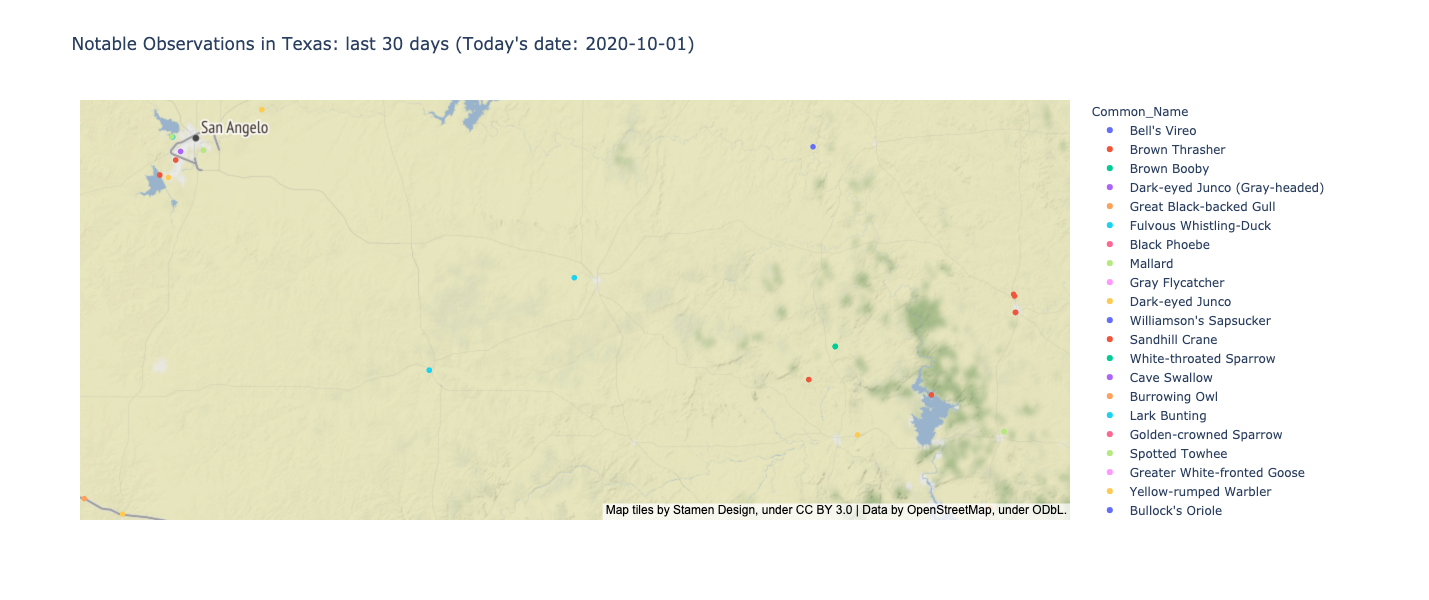

In [104]:
# mapbox_style options:
#     'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
#     which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`

fig_df_notables = px.scatter_mapbox(
    df_notables,
    lat="lat",
    lon="lng",
    color="Common_Name",
    #     size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "Date"],
    title=f"All Notable Observations in {state}: last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=600,
)
fig_df_notables.show()

### Citation: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

In [15]:
df_notables.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'obsDt', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'subnational2Code', 'City_Name',
       'State_Code', 'State_Name', 'Country_Code', 'Country_Name',
       'userDisplayName', 'obsId', 'checklistId', 'presenceNoted',
       'hasComments', 'evidence', 'firstName', 'lastName', 'hasRichMedia',
       'Year', 'Month', 'Day'],
      dtype='object')

In [16]:
name_count = df_notables["Common_Name"].value_counts()
name_count.to_frame()

Common_Name
Calliope Hummingbird                      154
Red-necked Phalarope                      108
Sabine's Gull                             107
Rufous Hummingbird                         92
Anna's Hummingbird                         81
...                                       ...
Eastern Wood-Pewee                          1
Fox Sparrow                                 1
Downy Woodpecker (Eastern)                  1
White-crowned Sparrow (oriantha)            1
Ferruginous Duck                            1

[322 rows x 1 columns]

In [31]:
calliope_df = df_notables.loc[df_notables["Common_Name"] == "Calliope Hummingbird"]
calliope_df.head(1)

Species_Code           Common_Name       Scientific_Name    locId  \
497       calhum  Calliope Hummingbird  Selasphorus calliope  L839995   

                                  locName             obsDt  Bird_Count  \
497  Riverpark Nature Trails (Sugar Land)  2020-09-26 16:15         1.0   

          lat        lng  obsValid  ...  checklistId  presenceNoted  \
497  29.57722 -95.677732      True  ...      CL22324          False   

    hasComments evidence firstName    lastName hasRichMedia  Year Month Day  
497       False      NaN      Jean  Greenhalgh        False  2020     9  26  

[1 rows x 31 columns]

In [43]:
species = "Calliope Hummingbird"

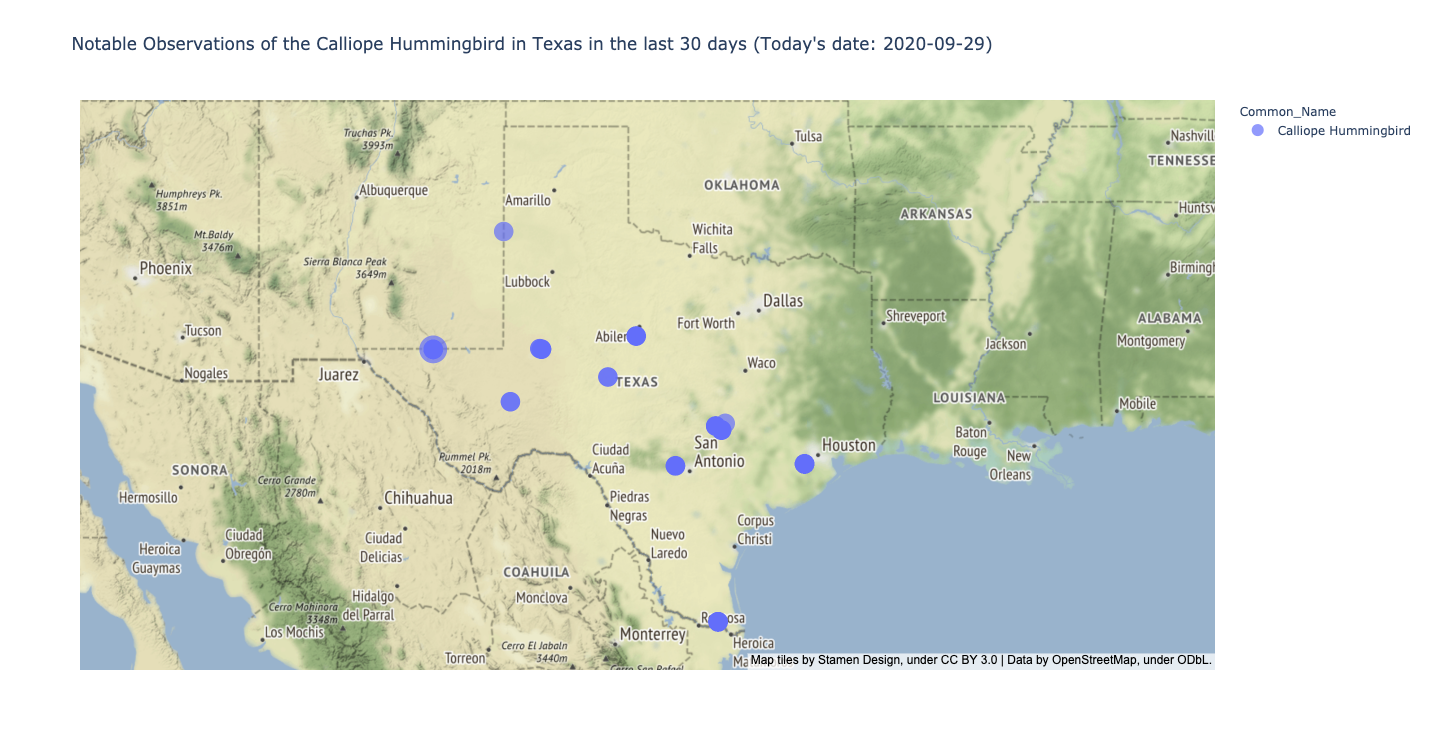

In [168]:
# Maps with plotly

species_plot = df_notables.loc[df_notables["Common_Name"] == f"{species}"]

fig_species_plot = px.scatter_mapbox(
    species_plot,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "obsDt"],
    title=f"Notable Observations of the {species} in {state} in the last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    height=750,
)
fig_species_plot.show()

### TAXONOMY of Calliope

In [51]:
species_code = "calhum"

In [32]:
# Get the taxonomy for the most common observed species
url_species_taxonomy = "https://api.ebird.org/v2/ref/taxonomy/ebird"

r_species_taxonomy = requests.get(
    url_species_taxonomy,
    params={"key": api_key, "fmt": "json", "species": species_code},
)

In [33]:
r_species_taxonomy.json()

[{'sciName': 'Selasphorus calliope',
  'comName': 'Calliope Hummingbird',
  'speciesCode': 'calhum',
  'category': 'species',
  'taxonOrder': 4691.0,
  'bandingCodes': ['CAHU'],
  'comNameCodes': [],
  'sciNameCodes': ['SECA'],
  'order': 'Caprimulgiformes',
  'familyComName': 'Hummingbirds',
  'familySciName': 'Trochilidae'}]

In [36]:
df_species_taxonomy = pd.DataFrame(r_species_taxonomy.json())
df_species_taxonomy

sciName               comName speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName familySciName  
0  Hummingbirds   Trochilidae

In [41]:
df_species_taxonomy = df_species_taxonomy.rename(
    columns={
        "order": "Order",
        "familySciName": "Family_Name",
        "comName": "Common_Name",
        "sciName": "Scientific_Name",
    }
)

In [42]:
df_species_taxonomy

Scientific_Name           Common_Name speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             Order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName  Family_Name  
0  Hummingbirds  Trochilidae

In [38]:
calliope_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'obsDt', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'subnational2Code', 'City_Name',
       'State_Code', 'State_Name', 'Country_Code', 'Country_Name',
       'userDisplayName', 'obsId', 'checklistId', 'presenceNoted',
       'hasComments', 'evidence', 'firstName', 'lastName', 'hasRichMedia',
       'Year', 'Month', 'Day'],
      dtype='object')

# START - US

### Calliope across the US - normal observations

In [52]:
# Get data for all specified species observations across the US

regionCodeUS = "US"

# https://api.ebird.org/v2/data/obs/{{regionCode}}/recent/{{speciesCode}}

url_species_US = (
    f"https://api.ebird.org/v2/data/obs/" + regionCodeUS + "/recent/" + species_code
)

r_species_US = requests.get(url_species_US, params={"key": api_key, "back": back_long})

In [54]:
r_species_US.status_code

200

In [64]:
df_species_US = pd.DataFrame(r_species_US.json())

In [94]:
df_species_US["howMany"].fillna(value=1, inplace=True)

In [97]:
df_species_US["Notable_Normal"] = 1
df_species_US

speciesCode               comName               sciName      locId  \
0        calhum  Calliope Hummingbird  Selasphorus calliope    L268114   
1        calhum  Calliope Hummingbird  Selasphorus calliope    L129060   
2        calhum  Calliope Hummingbird  Selasphorus calliope    L263942   
3        calhum  Calliope Hummingbird  Selasphorus calliope    L247122   
4        calhum  Calliope Hummingbird  Selasphorus calliope    L264842   
..          ...                   ...                   ...        ...   
506      calhum  Calliope Hummingbird  Selasphorus calliope   L3914786   
507      calhum  Calliope Hummingbird  Selasphorus calliope   L6337663   
508      calhum  Calliope Hummingbird  Selasphorus calliope   L3758077   
509      calhum  Calliope Hummingbird  Selasphorus calliope  L12197543   
510      calhum  Calliope Hummingbird  Selasphorus calliope  L12196031   

                                               locName             obsDt  \
0                      Madera Canyon--Santa Rita Lodge  2020-09-30 06:26   
1                                               Portal  2020-09-29 15:27   
2                            Christmas Mountains Oasis  2020-09-29 13:41   
3         Paton Center for Hummingbirds (Patons' Yard)  2020-09-29 10:37   
4                  Miller Canyon--Beatty's Guest Ranch  2020-09-29 08:10   
..                                                 ...               ...   
506              Bosque River Loop Trail, Ojo Caliente  2020-09-01 08:00   
507  Pleasant Valley & Lake Canal greenbelt at W La...  2020-09-01 07:40   
508              US-CO-Grand Junction-520 Riverview Dr  2020-09-01 07:33   
509  4100 Arizona Ave, Los Alamos US-NM 35.90445, -...  2020-09-01 07:02   
510  2514 Navajo Blvd, Holbrook US-AZ 34.93258, -11...  2020-09-01 06:15   

     howMany        lat         lng  obsValid  obsReviewed  locationPrivate  \
0        1.0  31.725151 -110.880107      True        False            False   
1        1.0  31.913601 -109.140800      True        False            False   
2        1.0  29.491777 -103.467039      True        False            False   
3        1.0  31.539013 -110.760634      True        False            False   
4        2.0  31.415602 -110.276528      True        False            False   
..       ...        ...         ...       ...          ...              ...   
506      1.0  36.304900 -106.050415      True        False            False   
507      1.0  40.568837 -105.127859      True        False            False   
508      1.0  39.080072 -108.614438      True        False             True   
509      2.0  35.904451 -106.325099      True        False             True   
510      1.0  34.932585 -110.135322      True        False             True   

         subId  Notable_Normal  
0    S74246757               1  
1    S74221578               1  
2    S74228818               1  
3    S74215516               1  
4    S74232217               1  
..         ...             ...  
506  S73088442               1  
507  S73064907               1  
508  S73064928               1  
509  S73063629               1  
510  S73066656               1  

[511 rows x 14 columns]

In [105]:
pd.to_datetime(df_species_US["obsDt"])
df_species_US["Year"] = pd.DatetimeIndex(df_species_US["obsDt"]).year
df_species_US["Month"] = pd.DatetimeIndex(df_species_US["obsDt"]).month
df_species_US["Day"] = pd.DatetimeIndex(df_species_US["obsDt"]).day
df_species_US

speciesCode               comName               sciName      locId  \
0        calhum  Calliope Hummingbird  Selasphorus calliope    L268114   
1        calhum  Calliope Hummingbird  Selasphorus calliope    L129060   
2        calhum  Calliope Hummingbird  Selasphorus calliope    L263942   
3        calhum  Calliope Hummingbird  Selasphorus calliope    L247122   
4        calhum  Calliope Hummingbird  Selasphorus calliope    L264842   
..          ...                   ...                   ...        ...   
506      calhum  Calliope Hummingbird  Selasphorus calliope   L3914786   
507      calhum  Calliope Hummingbird  Selasphorus calliope   L6337663   
508      calhum  Calliope Hummingbird  Selasphorus calliope   L3758077   
509      calhum  Calliope Hummingbird  Selasphorus calliope  L12197543   
510      calhum  Calliope Hummingbird  Selasphorus calliope  L12196031   

                                               locName             obsDt  \
0                      Madera Canyon--Santa Rita Lodge  2020-09-30 06:26   
1                                               Portal  2020-09-29 15:27   
2                            Christmas Mountains Oasis  2020-09-29 13:41   
3         Paton Center for Hummingbirds (Patons' Yard)  2020-09-29 10:37   
4                  Miller Canyon--Beatty's Guest Ranch  2020-09-29 08:10   
..                                                 ...               ...   
506              Bosque River Loop Trail, Ojo Caliente  2020-09-01 08:00   
507  Pleasant Valley & Lake Canal greenbelt at W La...  2020-09-01 07:40   
508              US-CO-Grand Junction-520 Riverview Dr  2020-09-01 07:33   
509  4100 Arizona Ave, Los Alamos US-NM 35.90445, -...  2020-09-01 07:02   
510  2514 Navajo Blvd, Holbrook US-AZ 34.93258, -11...  2020-09-01 06:15   

     howMany        lat         lng  obsValid  obsReviewed  locationPrivate  \
0        1.0  31.725151 -110.880107      True        False            False   
1        1.0  31.913601 -109.140800      True        False            False   
2        1.0  29.491777 -103.467039      True        False            False   
3        1.0  31.539013 -110.760634      True        False            False   
4        2.0  31.415602 -110.276528      True        False            False   
..       ...        ...         ...       ...          ...              ...   
506      1.0  36.304900 -106.050415      True        False            False   
507      1.0  40.568837 -105.127859      True        False            False   
508      1.0  39.080072 -108.614438      True        False             True   
509      2.0  35.904451 -106.325099      True        False             True   
510      1.0  34.932585 -110.135322      True        False             True   

         subId  Notable_Normal  Year  Month  Day  
0    S74246757               1  2020      9   30  
1    S74221578               1  2020      9   29  
2    S74228818               1  2020      9   29  
3    S74215516               1  2020      9   29  
4    S74232217               1  2020      9   29  
..         ...             ...   ...    ...  ...  
506  S73088442               1  2020      9    1  
507  S73064907               1  2020      9    1  
508  S73064928               1  2020      9    1  
509  S73063629               1  2020      9    1  
510  S73066656               1  2020      9    1  

[511 rows x 17 columns]

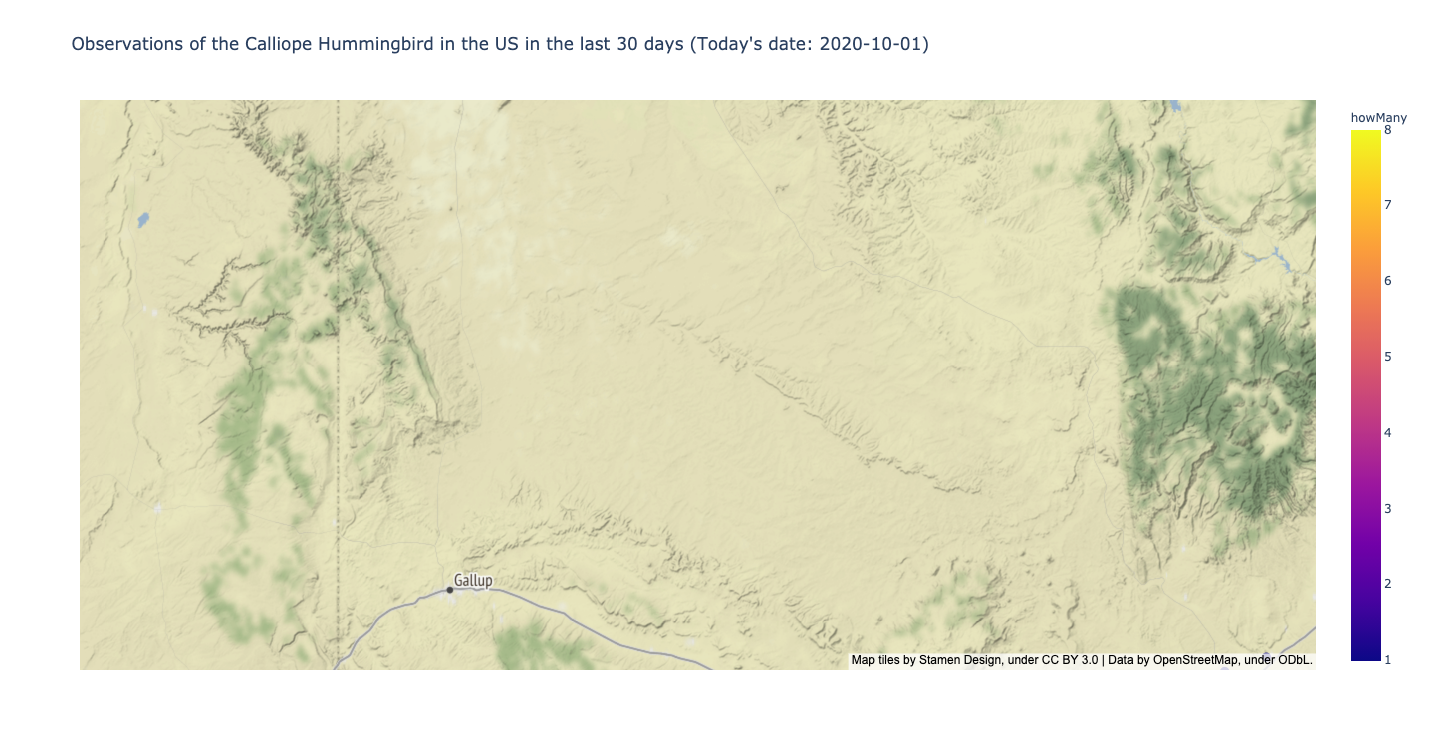

In [96]:
# species_plot = df_species_US.loc[df_species_US["comName"] == f"{species}"]

# Covering US for full 30 days and especially for a single species won't work because you're limited to 10k records. Could be missing a large portion of data.

fig_df_species_US = px.scatter_mapbox(
    df_species_US,
    lat="lat",
    lon="lng",
    color="howMany",
    size="howMany",
    hover_name="comName",
    hover_data=["sciName", "howMany", "obsDt"],
    title=f"Observations of the {species} in the US in the last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
)
fig_df_species_US.show()

In [106]:
animate_species_df = df_species_US.sort_values(by=["Day"], ignore_index=True)

fig_animate_species = px.scatter_geo(
    animate_species_df,
    color="comName",
    lat="lat",
    lon="lng",
    hover_name="sciName",
    size="howMany",
    animation_frame="Day",
    projection="albers usa",
    title=f"Count of notable bird observations over the last {back_long} days by daily total (Today's date: {today})",
)

fig_animate_species.show()

NameError: name 'fig_animate' is not defined

### All notable observations across the US

In [ ]:
# Get data for all notable observations across the US

regionCodeUS = "US"



url_notables_US = (
    f"https://api.ebird.org/v2/data/obs/" + regionCodeUS + "/recent/notable?"
)

r_notables_US = requests.get(
    url_notables_US, params={"key": api_key, "back": back_short, "detail": "full"}
)

In [39]:
df_notables_US = pd.DataFrame(r_notables_US.json())
df_notables_US.columns

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'evidence',
       'firstName', 'lastName', 'hasRichMedia'],
      dtype='object')

In [40]:
df_notables_US["howMany"].fillna(value=1, inplace=True)

In [41]:
df_notables_US

speciesCode                     comName               sciName      locId  \
0         brnthr              Brown Thrasher       Toxostoma rufum   L4790127   
1         brnthr              Brown Thrasher       Toxostoma rufum   L4790127   
2         brnthr              Brown Thrasher       Toxostoma rufum   L4790127   
3         amewoo           American Woodcock        Scolopax minor   L6235318   
4         ycnher  Yellow-crowned Night-Heron   Nyctanassa violacea   L6235318   
...          ...                         ...                   ...        ...   
8234     rosspo1           Roseate Spoonbill        Platalea ajaja    L710850   
8235     rosspo1           Roseate Spoonbill        Platalea ajaja    L710850   
8236      earque               Eared Quetzal   Euptilotis neoxenus  L12323203   
8237     whsowl1       Whiskered Screech-Owl  Megascops trichopsis    L128985   
8238      wilpha          Wilson's Phalarope   Phalaropus tricolor  L12387017   

                                                locName             obsDt  \
0                             Olds Creek Bird Sanctuary  2020-09-30 19:57   
1                             Olds Creek Bird Sanctuary  2020-09-30 19:57   
2                             Olds Creek Bird Sanctuary  2020-09-30 19:57   
3                               Robinson/Vanderah House  2020-09-30 19:43   
4                               Robinson/Vanderah House  2020-09-30 19:43   
...                                                 ...               ...   
8234                            Glendale Recharge Ponds  2020-09-28 05:46   
8235                            Glendale Recharge Ponds  2020-09-28 05:46   
8236  stakeout Eared Quetzal, FR42 between Sunny Fla...  2020-09-28 05:45   
8237                  Cave Creek Canyon--Herb Martyr CG  2020-09-28 04:46   
8238  Blue Star Memorial Hwy, Centreville US-MD (39....  2020-09-28 02:00   

      howMany        lat         lng  obsValid  ...    countryName  \
0         1.0  30.621147 -103.982382     False  ...  United States   
1         1.0  30.621147 -103.982382     False  ...  United States   
2         1.0  30.621147 -103.982382     False  ...  United States   
3         1.0  29.482305  -82.263942     False  ...  United States   
4         1.0  29.482305  -82.263942     False  ...  United States   
...       ...        ...         ...       ...  ...            ...   
8234      3.0  33.524224 -112.286582      True  ...  United States   
8235      3.0  33.524224 -112.286582      True  ...  United States   
8236      2.0  31.881505 -109.189116      True  ...  United States   
8237      2.0  31.872499 -109.233597      True  ...  United States   
8238      1.0  39.000083  -76.123466      True  ...  United States   

       userDisplayName         obsId checklistId presenceNoted hasComments  \
0        Cecilia Riley  OBS989134631     CL23634         False       False   
1        Cecilia Riley  OBS989134631     CL23634         False       False   
2        Cecilia Riley  OBS989134631     CL23634         False       False   
3       Scott Robinson  OBS989076633     CL24521         False       False   
4       Scott Robinson  OBS989076626     CL24521         False       False   
...                ...           ...         ...           ...         ...   
8234         Jeff Ritz  OBS988067975     CL22360         False       False   
8235         Jeff Ritz  OBS988067975     CL22360         False       False   
8236  Rose Ann Rowlett  OBS988319691     CL22345         False       False   
8237        Eric Hough  OBS988170505     CL22345         False       False   
8238       John Lowery  OBS988099540     CL22838         False       False   

     evidence firstName     lastName hasRichMedia  
0           P   Cecilia        Riley         True  
1           P   Cecilia        Riley         True  
2           P   Cecilia        Riley         True  
3         NaN     Scott     Robinson        False  
4         NaN     Scott     Robinson        False  
...       ...    

### CALLLIOPE

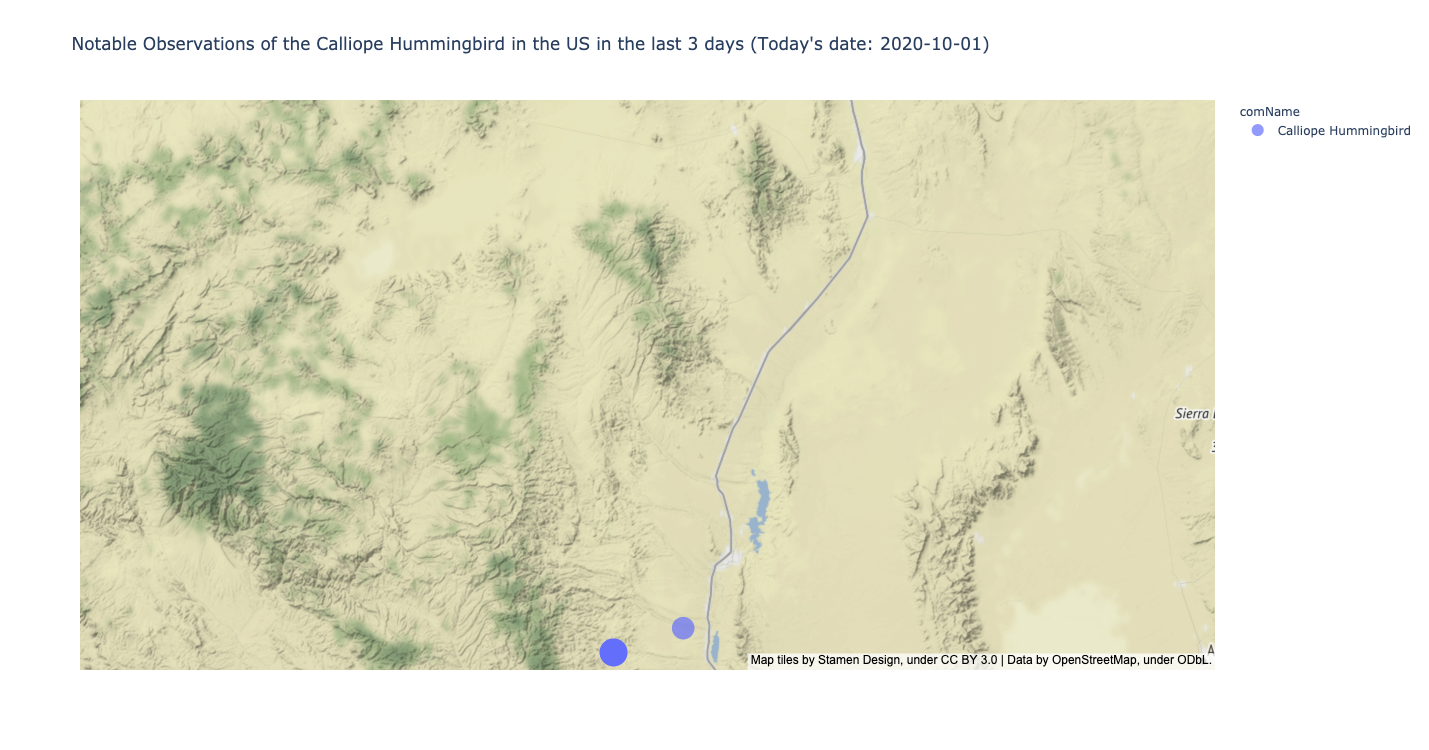

In [48]:
species_plot = df_notables_US.loc[df_notables_US["comName"] == f"{species}"]

# Covering US for full 30 days and especially for a single species won't work because you're limited to 10k records. Could be missing a large portion of data.

fig_df_notables_US = px.scatter_mapbox(
    species_plot,
    lat="lat",
    lon="lng",
    color="comName",
    size="howMany",
    hover_name="comName",
    hover_data=["howMany", "obsDt"],
    title=f"Notable Observations of the {species} in the US in the last {back_short} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
)
fig_df_notables_US.show()

## Histogram of observations count by US State

In [24]:
state_code = df_notables_US["subnational1Code"]

state_codes = pd.DataFrame({"State_Code": state_code})

NameError: name 'df_notables_US' is not defined

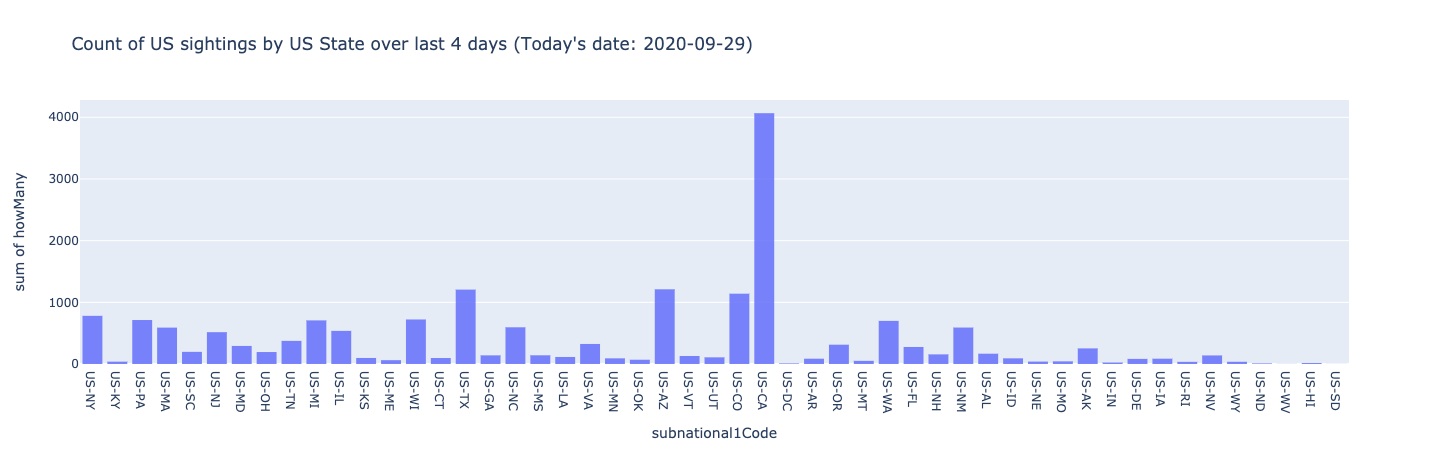

In [80]:
# loc_state = df_notables_US["subnational1Code"].unique()
# obs_count = df_notables_US["subnational1Code"].value_counts()

px.histogram(
    df_notables_US,
    x="subnational1Code",
    y="howMany",
    title=f"Count of US sightings by US State over last {back} days (Today's date: {today})",
    labels={"y": "Obs Count"},
    opacity=0.85,
    hover_name="subnational1Code",
)

# Animated Map

In [81]:
# df_notables_US = df_notables_US.dropna().reset_index(drop=True)

In [82]:
pd.to_datetime(df_notables_US["obsDt"])
df_notables_US["Year"] = pd.DatetimeIndex(df_notables_US["obsDt"]).year
df_notables_US["Month"] = pd.DatetimeIndex(df_notables_US["obsDt"]).month
df_notables_US["Day"] = pd.DatetimeIndex(df_notables_US["obsDt"]).day

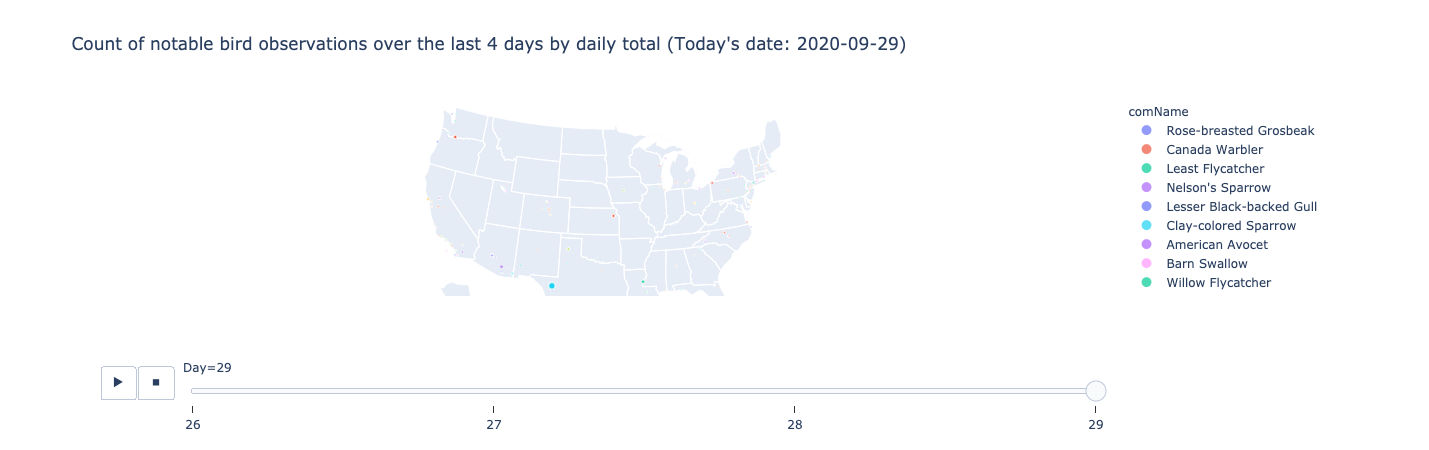

In [83]:
# Animate observations over time (4 days. Going back more than 4 days exceeds the allowable limit on number of records to request at a time for the API).
# Was going to iteratively add counts by days but maybe don't want to show the accumulation? May just want to show the total by day?
# Have two maps: one with accumulated observations over the 4 days, one with counts per day.
# With this map, you can identify an observation of interest, then research the bird type to find out why the observation is "notable".

animate_plot_df = df_notables_US.sort_values(by=["Day"], ignore_index=True)

fig_animate = px.scatter_geo(
    animate_plot_df,
    color="comName",
    lat="lat",
    lon="lng",
    hover_name="sciName",
    size="howMany",
    animation_frame="Day",
    projection="albers usa",
    title=f"Count of notable bird observations over the last {back} days by daily total (Today's date: {today})",
)

fig_animate.show()

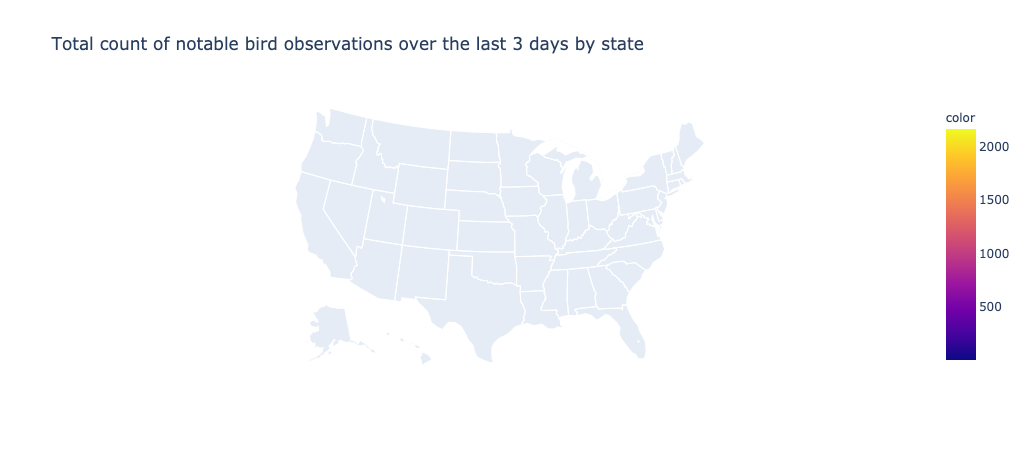

In [127]:
fig_bubble = px.scatter_geo(
    df_notables_US,
    color=obs_count,
    locations=loc_state,
    hover_name=obs_count,
    size=obs_count,
    projection="albers usa",
    title=f"Total count of notable bird observations over the last {back} days by state (Today's date: {today})",
)
fig_bubble.show()

## Notes:
### Data cleaning: 
#### * Renamed columns --Drop some unneeded columns?
#### * From obsDt column, created new columns Year, Month, Day, and US_State.
#### * Filtered out rows with NA data. Was it only one row with NA for "howMany"? If so, maybe do .fillna() with a value of "1" since the observation wouldn't have been recorded if there were 0 birds. Also, most observations are of 1 bird, right?

### Multiple Data Sources:
#### * eBird
#### * Google API - used reverse geocoding to get state from lat/long. --still working on this (9/28/20)--

# TEST AREA

In [36]:
# latlong = "40.714224,-73.961452"
# url_googleapi = (
#     f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}"
# )

# r_states = requests.get(url_googleapi)

# states = r_states.json()
# states["results"][0]["address_components"][5]["short_name"]

# state = states["results"][0]["address_components"][5]["short_name"]
# state

In [25]:
# url_googleapi = (f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}")

state_abbr = [
    "AL",
    "AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DC",
    "DE",
    "FL",
    "GA",
    "HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

for i in df_notables.index:

    lat = df_notables.loc[i, "lat"]
    lng = df_notables.loc[i, "lng"]

    lat_lng_str = str(lat) + "," + str(lng)

    try:
        r_states = requests.get(
            f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}"
        )

        states = r_states.json()
        state = states["results"][0]["address_components"][4]["short_name"]

        df_notables.loc[i, "US_State"] = state
    except:
        pass

In [135]:
states["results"][0]["address_components"][4]["short_name"]

'TX'

In [136]:
states["results"][0]["address_components"]

[{'long_name': '1104', 'short_name': '1104', 'types': ['street_number']},
 {'long_name': 'Scarlet Court',
  'short_name': 'Scarlet Ct',
  'types': ['route']},
 {'long_name': 'Colleyville',
  'short_name': 'Colleyville',
  'types': ['locality', 'political']},
 {'long_name': 'Tarrant County',
  'short_name': 'Tarrant County',
  'types': ['administrative_area_level_2', 'political']},
 {'long_name': 'Texas',
  'short_name': 'TX',
  'types': ['administrative_area_level_1', 'political']},
 {'long_name': 'United States',
  'short_name': 'US',
  'types': ['country', 'political']},
 {'long_name': '76034', 'short_name': '76034', 'types': ['postal_code']},
 {'long_name': '4107', 'short_name': '4107', 'types': ['postal_code_suffix']}]

In [137]:
df_notables.loc[df_notables["US_State"] == "Bell County"]

speciesCode           comName           sciName     locId  \
96      coukin  Couch's Kingbird  Tyrannus couchii  L4904145   

                          locName             obsDt  howMany        lat  \
96  Belton--Harris Community Park  2020-09-26 15:55      1.0  31.060991   

          lng  obsValid  obsReviewed  locationPrivate      subId     US_State  
96 -97.465424      True         True            False  S74098380  Bell County

In [138]:
r_check = requests.get(
    f"https://maps.googleapis.com/maps/api/geocode/json?latlng=31.060991,-97.465424&key={g_key}"
)
check = r_check.json()

In [139]:
check["results"][0]["address_components"][4]

{'long_name': 'Bell County',
 'short_name': 'Bell County',
 'types': ['administrative_area_level_2', 'political']}

In [142]:
# getting a list of sub-region codes (subnational1 for US is a list of states, subnational2 for US-TX is a list of cities)
regionType = "subnational1"
parentRegionCode = "US-TX"

url_state_codes = (
    "https://api.ebird.org/v2/ref/region/list/"
    + regionType
    + "/"
    + parentRegionCode
    + ".json"
)

r_state_codes = requests.get(url_state_codes, params={"key": api_key})

df_state_codes = pd.DataFrame(r.json())
df_state_codes

code      name
0    US-TX-001  Anderson
1    US-TX-003   Andrews
2    US-TX-005  Angelina
3    US-TX-007   Aransas
4    US-TX-009    Archer
..         ...       ...
249  US-TX-499      Wood
250  US-TX-501    Yoakum
251  US-TX-503     Young
252  US-TX-505    Zapata
253  US-TX-507    Zavala

[254 rows x 2 columns]

In [43]:
# for i in df_notables_US.index:

#     lat = df_notables_US.loc[i, "lat"]
#     lng = df_notables_US.loc[i, "lng"]

#     lat_lng_str = str(lat) + "," + str(lng)

#     try:
#         r = requests.get(
#             "https://maps.googleapis.com/maps/api/place/nearbysearch/json",
#             params={
#                 "location": lat_lng_str,
#                 "radius": 5000,
#                 "type": "lodging",
#                 "key": g_key,
#             },
#         )
#         hotel_df.loc[i, "Hotel_Name"] = r.json()["results"][0]["name"]
#     except:
#         pass